In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
def random_function(n :int):
    return {
        i: {
            "amplitude": 10**random.uniform(0, 3),
            "damping": random.uniform(1, 3),  # Only positive = always decaying
            "frequency": random.uniform(0.0, 30.0),
            "phase": random.uniform(0, 2*np.pi),
        }
        for i in range(n)
    }

def create_random_csv(list):
    df = pd.DataFrame(list)
    return df

def signal_function(params, time):
    """Generate real-valued exponential signal"""
    return (
        params["amplitude"] 
        * np.exp(-params["damping"] * time) 
        * np.cos(2 * np.pi * params["frequency"] * time + params["phase"])
    )


def salt():
    return np.random.normal(0, 0.2) + 0.05*np.sin(2*np.pi*np.random.random())

def random_sample(param_dict, intervalo, malha):
    
    time_points = np.arange(intervalo[0], intervalo[1], malha)

    result = {
        str(t): {
            'y-coordinate': sum([
                signal_function(params, t) 
                for params in param_dict.values()
            ])+salt(),
            'tempo': t
        }
        for t in time_points
    }
    return pd.DataFrame(result).T

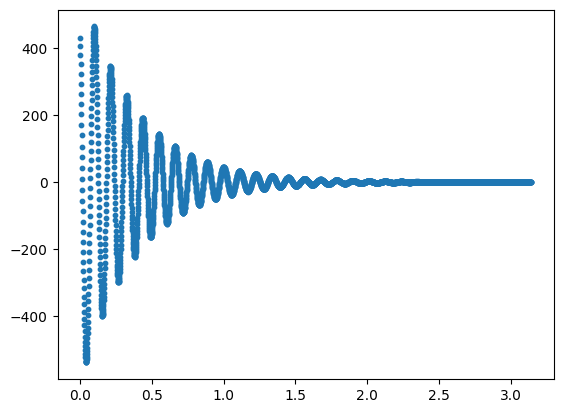

{0: {'amplitude': 1.3832837327296315,
  'damping': 2.481896250985499,
  'frequency': 6.0569784087446985,
  'phase': 0.4047558104421686},
 1: {'amplitude': 600.3731442385769,
  'damping': 2.615006869012454,
  'frequency': 8.881069135669224,
  'phase': 0.7755720503834868}}

In [14]:

params = random_function(2)
    
df_samples = random_sample(params, (0, np.pi), 0.001)
df_samples.to_csv(r"sample.csv")

plt.scatter(df_samples["tempo"], df_samples["y-coordinate"], s = 10)
plt.show()
params
